<a href="https://colab.research.google.com/github/sBx99/comp-viz/blob/master/day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Face Detection with OpenCV and Deep Learning**

- [x] [Tutorial](https://www.pyimagesearch.com/2018/02/26/face-detection-with-opencv-and-deep-learning/?__s=q9gweb7jownsew350c2k)
- [x] [Code](http://t.dripemail2.com/c/eyJhY2NvdW50X2lkIjoiNDc2ODQyOSIsImRlbGl2ZXJ5X2lkIjoibjFqdXZrZjhzM3g2azZhb3lpMngiLCJ1cmwiOiJodHRwOi8vcHlpbWcuY28vMXl5ZXQ_X19zPXE5Z3dlYjdqb3duc2V3MzUwYzJrIn0)
- [x] [Pdf](http://t.dripemail2.com/c/eyJhY2NvdW50X2lkIjoiNDc2ODQyOSIsImRlbGl2ZXJ5X2lkIjoibjFqdXZrZjhzM3g2azZhb3lpMngiLCJ1cmwiOiJodHRwOi8vcHlpbWcuY28vYWU4N24_X19zPXE5Z3dlYjdqb3duc2V3MzUwYzJrIn0)

In [1]:
# imports
import numpy as np
import argparse
import cv2

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

## **Images**

In [15]:
# requirements
image = '/content/iron_chic.jpg' # path to input image
prototxt = '/content/deploy.prototxt.txt' # path to Caffe 'deploy' prototxt file
model = '/content/res10_300x300_ssd_iter_140000.caffemodel' # path to Caffe pre-trained model
confidence = 0.5 # minimum probability to filter weak detections

In [6]:
# load our serialized model from disk
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe(prototxt, model)

[INFO] loading model...


In [8]:
# load the input image and construct an input blob for the image
# by resizing to a fixed 300x300 pixels and then normalizing it
img = cv2.imread(image)
(h, w) = img.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 1.0,
	(300, 300), (104.0, 177.0, 123.0))

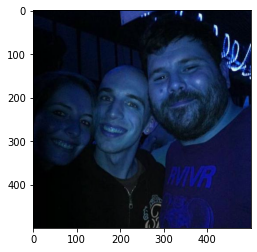

In [12]:
plt.imshow(img)

In [13]:
# pass the blob through the network and obtain the detections and
# predictions
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing object detections...


In [17]:
# loop over the detections
for i in range(0, detections.shape[2]):
	# extract the confidence (i.e., probability) associated with the
	# prediction
	cnf = detections[0, 0, i, 2]

	# filter out weak detections by ensuring the `confidence` is
	# greater than the minimum confidence
	if cnf > confidence:
		# compute the (x, y)-coordinates of the bounding box for the
		# object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
 
		# draw the bounding box of the face along with the associated
		# probability
		text = "{:.2f}%".format(cnf * 100)
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(img, (startX, startY), (endX, endY),
			(0, 0, 255), 2)
		cv2.putText(img, text, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

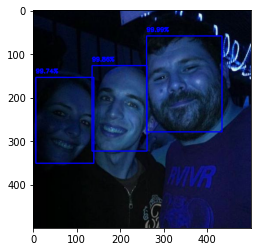

In [20]:
# show the output image
plt.imshow(img)

## **Videos**

In [ ]:
# USAGE
# python detect_faces_video.py --prototxt deploy.prototxt.txt --model res10_300x300_ssd_iter_140000.caffemodel

# import the necessary packages
from imutils.video import VideoStream
import numpy as np
import argparse
import imutils
import time
import cv2

# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-p", "--prototxt", required=True,
	help="path to Caffe 'deploy' prototxt file")
ap.add_argument("-m", "--model", required=True,
	help="path to Caffe pre-trained model")
ap.add_argument("-c", "--confidence", type=float, default=0.5,
	help="minimum probability to filter weak detections")
args = vars(ap.parse_args())

# load our serialized model from disk
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe(args["prototxt"], args["model"])

# initialize the video stream and allow the cammera sensor to warmup
print("[INFO] starting video stream...")
vs = VideoStream(src=0).start()
time.sleep(2.0)

# loop over the frames from the video stream
while True:
	# grab the frame from the threaded video stream and resize it
	# to have a maximum width of 400 pixels
	frame = vs.read()
	frame = imutils.resize(frame, width=400)
 
	# grab the frame dimensions and convert it to a blob
	(h, w) = frame.shape[:2]
	blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0,
		(300, 300), (104.0, 177.0, 123.0))
 
	# pass the blob through the network and obtain the detections and
	# predictions
	net.setInput(blob)
	detections = net.forward()

	# loop over the detections
	for i in range(0, detections.shape[2]):
		# extract the confidence (i.e., probability) associated with the
		# prediction
		confidence = detections[0, 0, i, 2]

		# filter out weak detections by ensuring the `confidence` is
		# greater than the minimum confidence
		if confidence < args["confidence"]:
			continue

		# compute the (x, y)-coordinates of the bounding box for the
		# object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
 
		# draw the bounding box of the face along with the associated
		# probability
		text = "{:.2f}%".format(confidence * 100)
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(frame, (startX, startY), (endX, endY),
			(0, 0, 255), 2)
		cv2.putText(frame, text, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

	# show the output frame
	cv2.imshow("Frame", frame)
	key = cv2.waitKey(1) & 0xFF
 
	# if the `q` key was pressed, break from the loop
	if key == ord("q"):
		break

# do a bit of cleanup
cv2.destroyAllWindows()
vs.stop()